Data 
1. datetime - hourly date + timestamp  
**categorical columns**
2. season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
3. holiday - whether the day is considered a holiday
4. workingday - whether the day is neither a weekend nor holiday
**weather**
5.  1: Clear, Few clouds, Partly cloudy, Partly cloudy
6. 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
7. 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
8. 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
**Numerical columns**
9. temp - temperature in Celsius
10. atemp - "feels like" temperature in Celsius
11. humidity - relative humidity
12. windspeed - wind speed
13. casual - number of non-registered user rentals initiated
14. registered - number of registered user rentals initiated
15. count - number of total rentals

In [117]:
#importing librearies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset link**
https://www.kaggle.com/competitions/bike-sharing-demand/data

In [118]:
#Loading the data
train_df=pd.read_csv("/content/train.csv")
test_df=pd.read_csv("/content/test.csv")


In [119]:
#Read first 5 rows
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [120]:
test_df.head() #Reading first five rows for test dataset

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [121]:
#Read last 
train_df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [122]:
#cheching the information of the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [123]:
test_df.info()   #Info of test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [124]:
#checking numerical analysis for train datatset
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [125]:
#checking numerical analysis for test datatset
test_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [126]:
#checking categorical analysis for train dataset
train_df.describe(include="O")

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [127]:
#checking categorical analysis for test dataset
test_df.describe(include="O")

,datetime
count,6493
unique,6493
top,2011-01-20 00:00:00
freq,1


In [128]:
#checking shape of train dataset
train_df.shape

(10886, 12)

In [129]:
#checking shape of test dataset
test_df.shape

(6493, 9)

Observations
1. We have the two dataset for Bike demand anaysis in which we have train dataset and test dataset.
2. Train dataset have total number of columns 12 and for test only 9.
3. Train dataset have total number of rows 10,886 and for test dataset we have only 6,439

#Exploratory data analysis

###Analysis of numerical columns

**Analysis of column "count" in train dataset**

In [130]:
#For column "count"
print(train_df["count"].max())
print(train_df["count"].min())
print(train_df["count"].mean())
print(train_df["count"].median())
print(train_df["count"].var())
print(train_df["count"].std())
print(train_df["count"].skew())

977
1
191.57413191254824
145.0
32813.31315347235
181.14445383028527
1.2420662117180776


<Axes: title={'center': 'Box plot for column count'}, xlabel='count'>

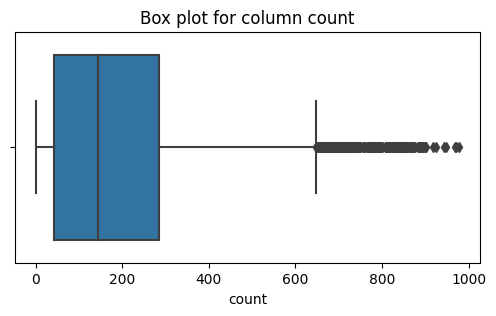

In [131]:
#Box plot for column count
plt.figure(figsize=(6,3))
plt.title("Box plot for column count")
sns.boxplot(x=train_df["count"])

<Axes: title={'center': 'Histogram for column count'}, xlabel='count', ylabel='Count'>

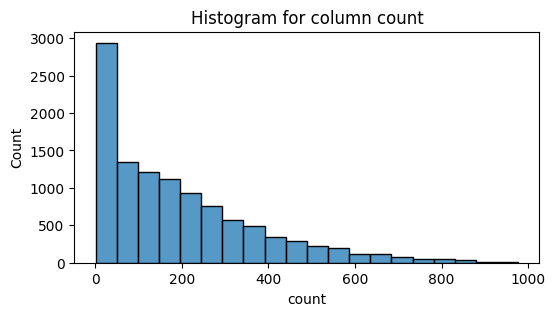

In [132]:
#Histogram plot for column count
plt.figure(figsize=(6,3))
plt.title("Histogram for column count")
sns.histplot(x=train_df["count"],bins=20)

<Figure size 600x300 with 0 Axes>

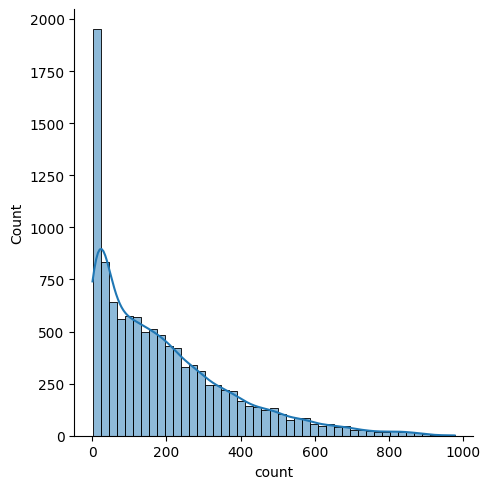

In [133]:
#Distribution plot plot for column count

#plt.title("Density plot for column count")
plt.figure(figsize=(6,3))
sns.displot(x=train_df["count"],kde="kind")

Observations
1. For count data it is clearly visible that most of data lies b/w 20 to 200
2. From density plot is define that data is skewed and centered around mean 191.5 with standard daviation 181.14.
3. And column has too much extreme values present

**Exploring numerical column humidity in train dataset for first 19 days of each month**

In [134]:
#For column "humidity"
print(train_df["humidity"].max())
print(train_df["humidity"].min())
print(train_df["humidity"].mean())
print(train_df["humidity"].median())
print(train_df["humidity"].var())
print(train_df["humidity"].std())
print(train_df["humidity"].skew())

100
0
61.88645967297446
62.0
370.371305848029
19.24503327739469
-0.08633518364548581


<Axes: title={'center': 'Box plot for column humidity'}, xlabel='humidity'>

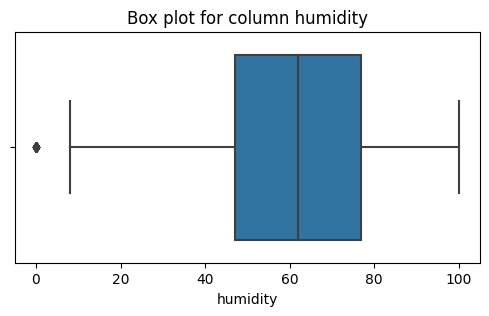

In [135]:
#Box plot for column humidity
plt.figure(figsize=(6,3))
plt.title("Box plot for column humidity")
sns.boxplot(x=train_df["humidity"])

<Axes: title={'center': 'Histogram for column humidity'}, xlabel='humidity', ylabel='Count'>

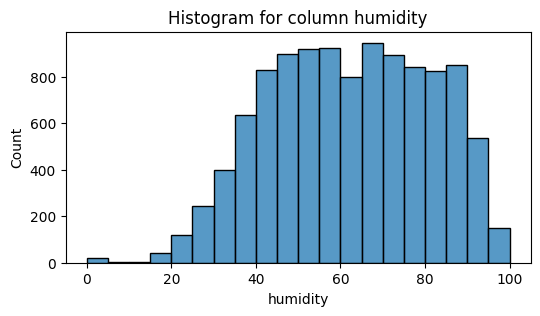

In [136]:
#Histogram plot for humidity count
plt.figure(figsize=(6,3))
plt.title("Histogram for column humidity")
sns.histplot(x=train_df["humidity"],bins=20)

<Axes: title={'center': 'Density for column humidity'}, xlabel='humidity', ylabel='Count'>

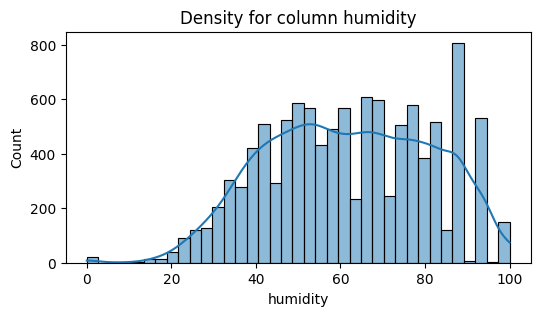

In [137]:
#Density plot for humidity count
plt.figure(figsize=(6,3))
plt.title("Density for column humidity")
sns.histplot(x=train_df["humidity"],kde="kind")

Observations
1. For Humidity column in train data it is clearly visible that most of data lies b/w 40 to 90
2. From density plot is define that data is skewed and centered around mean 61.88 with standard daviation 19.24.
3. And column has  no outliers 

**Checking Nuerical column Humdity for test dataset for last 11 dayas of each month**

In [138]:
#For column "humidity"
print(test_df["humidity"].max())
print(test_df["humidity"].min())
print(test_df["humidity"].mean())
print(test_df["humidity"].median())
print(test_df["humidity"].var())
print(test_df["humidity"].std())
print(test_df["humidity"].skew())

100
16
64.1252117665178
65.0
372.23493574150046
19.293390986073454
-0.15557326767756083


<Axes: title={'center': 'Box plot for column humidity'}, xlabel='humidity'>

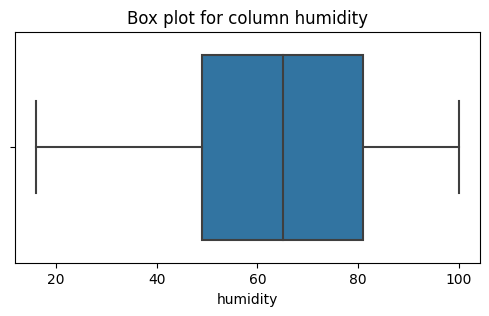

In [139]:
#Box plot for column humidity
plt.figure(figsize=(6,3))
plt.title("Box plot for column humidity")
sns.boxplot(x=test_df["humidity"])

<Axes: title={'center': 'Histogram for column humidity'}, xlabel='humidity', ylabel='Count'>

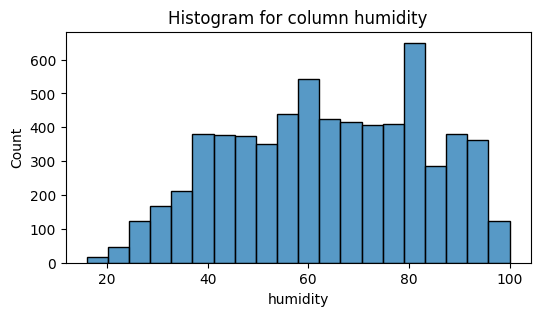

In [140]:
#Histogram plot for humidity count
plt.figure(figsize=(6,3))
plt.title("Histogram for column humidity")
sns.histplot(x=test_df["humidity"],bins=20)

<Figure size 600x300 with 0 Axes>

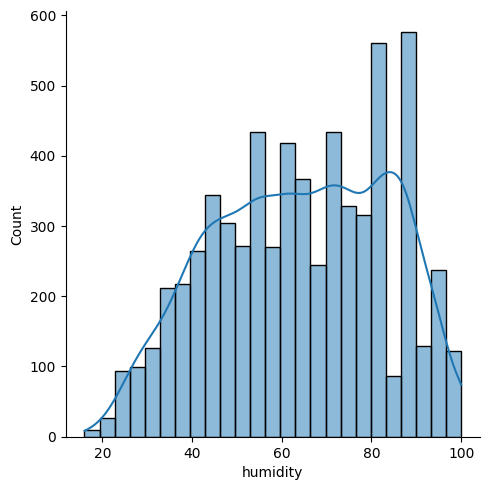

In [141]:
#Distribution plot plot for column count

#plt.title("Density plot for column count")
plt.figure(figsize=(6,3))
sns.displot(x=test_df["humidity"],kde="kind")

Observations
1. For Humidity column in test data it is clearly visible that most of data lies b/w 40 to 90 which is similer to train data.
2. From density plot is define that data is skewed and centered around mean 64.12 with standard daviation 19.29.
3. And column has no outliers

#Analysis of categorical columns

**Analysis of categorical column or psudo numerical column weather for train dataset**

In [142]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [143]:
train_df["weather"].unique()  #Checking unique values for column weather

array([1, 2, 3, 4])

In [144]:
train_df["weather"].value_counts() #Counting the values for each weather category

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [145]:
train_df["weather"].value_counts(normalize=True)*100 #Checking in % form

1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: weather, dtype: float64

<Axes: title={'center': 'countplot for column weather'}, xlabel='weather', ylabel='count'>

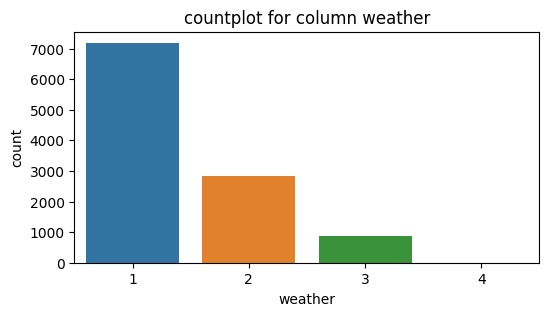

In [146]:
#Count plot for column weather
plt.figure(figsize=(6,3))
plt.title("countplot for column weather")
sns.countplot(x=train_df["weather"])

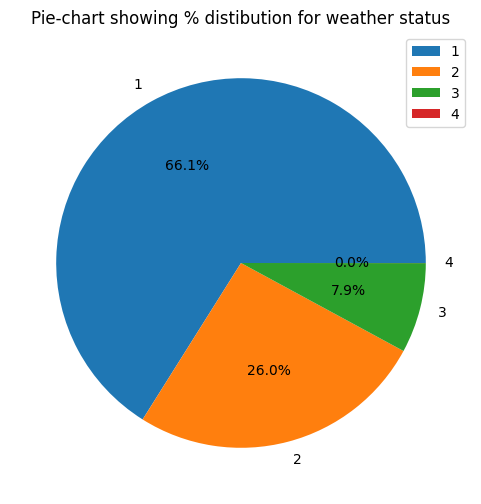

In [147]:
#pie plot for this column
plt.figure(figsize=(6,6))
plt.pie([7192,2834,859,1],labels=["1","2","3","4"], autopct='%1.1f%%')
plt.title("Pie-chart showing % distibution for weather status")
plt.legend()
plt.show()

Observations
1. So clearly visible that 66.1% of time weather condition is 1: Clear, Few clouds, Partly cloudy, Partly cloudy for month days 1 to 20
2. Chances of rain is zero which defines weather condition 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog for month days 1 to 20

**Analysis of categorical column or psudo numerical column season for train dataset**

In [148]:
train_df["season"].unique()  #Checking unique values for column season

array([1, 2, 3, 4])

In [149]:
train_df["season"].value_counts() #Counting the values for each season category

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

<Axes: title={'center': 'countplot for column season'}, xlabel='season', ylabel='count'>

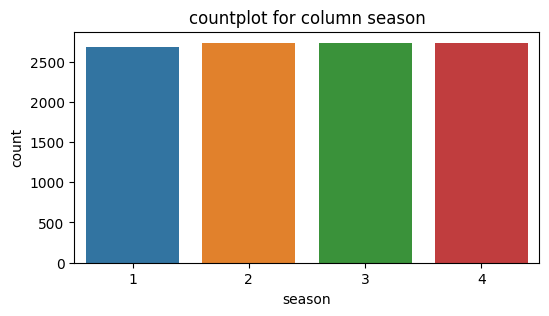

In [150]:
#Count plot for column season
plt.figure(figsize=(6,3))
plt.title("countplot for column season")
sns.countplot(x=train_df["season"])

Observation
1. Similer kind of seasons observed ,no much insights gain.
2. Collab with other columns for further analysis

In [151]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


#Exploring after combining two columns

**Combiining two columns "Humidity" & "count"**

<Axes: xlabel='humidity', ylabel='count'>

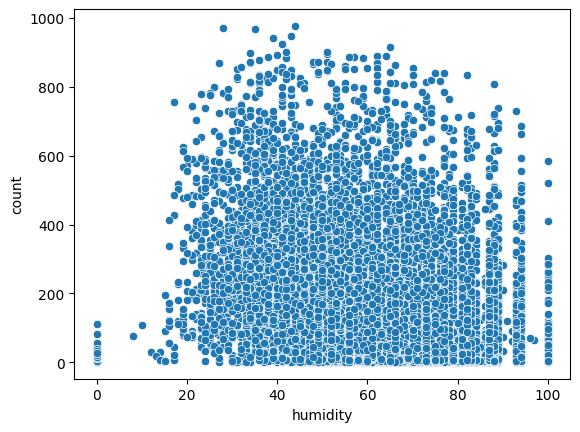

In [152]:
#Plotting scatter plot for  both columns
sns.scatterplot(x=train_df["humidity"],y=train_df["count"])

**Combining two columns "Temp" & "count" for train dataset**

<Axes: xlabel='temp', ylabel='count'>

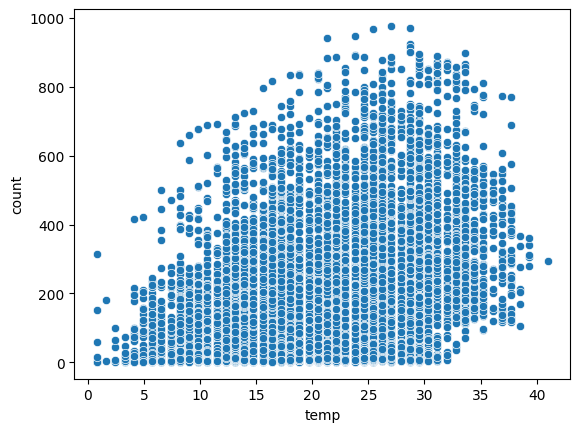

In [153]:
#Plotting scatter plot for  both columns
sns.scatterplot(x=train_df["temp"],y=train_df["count"])

**Combining two columns "windspeed" & "count" for train dataset**

<Axes: xlabel='windspeed', ylabel='count'>

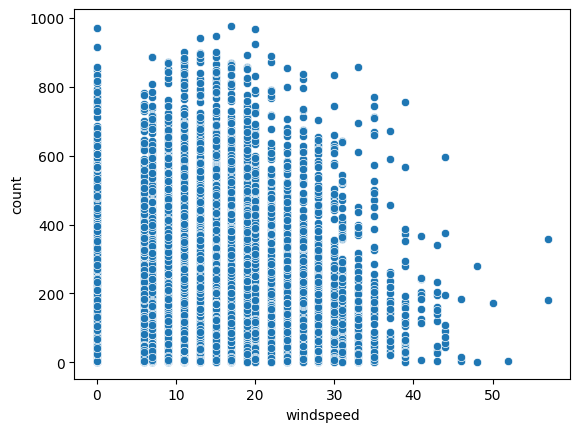

In [154]:
#Plotting scatter plot for  both columns
sns.scatterplot(x=train_df["windspeed"],y=train_df["count"])

**Combining two columns "atemp" & "count" for train dataset**

<Axes: xlabel='atemp', ylabel='count'>

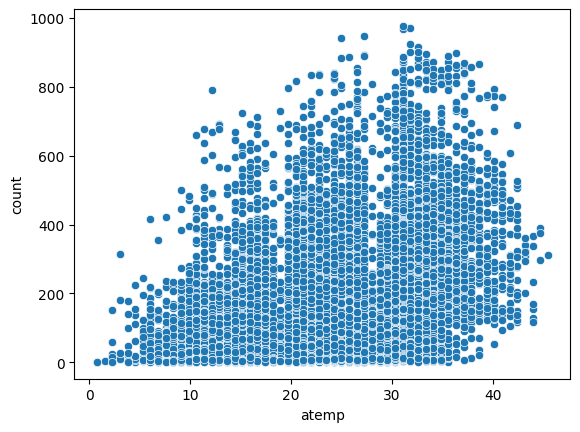

In [155]:
#Plotting scatter plot for  both columns
sns.scatterplot(x=train_df["atemp"],y=train_df["count"])

Observations
1. Combined all numerical columns with count for train dataset, with help of scatterplot
2. No strong relation found after making comparisions as all the data spread randomly in scatterplot for each numeric column against count
3. Only windspeed has lesser effect on rental business as windspeed increases rental of bike is decreases.
4. At zero windspeed the rent of bikes are very high
5. Renatal of bike business won't much any effect by "temperature,"Humidity"
,"Actual temprature" 
6. Temprature b/w 10 to 30 has high rental business 
 

#Combining all categorical columns with column count

**Combining two columns "Season" & "count"**

In [156]:
train_df.groupby(["season"])["count"].sum()

season
1    312498
2    588282
3    640662
4    544034
Name: count, dtype: int64

<Axes: xlabel='season', ylabel='count'>

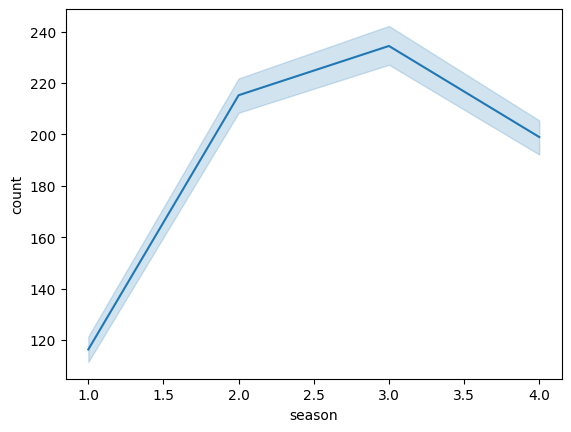

In [157]:
#Plotting line plot for  columns season and count
sns.lineplot(x=train_df["season"],y=train_df["count"])

<Axes: xlabel='season', ylabel='count'>

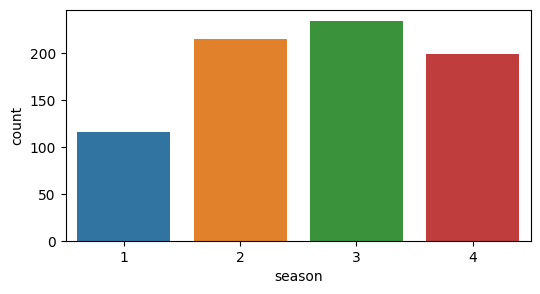

In [158]:
#Bar plot for both columns
plt.figure(figsize=(6,3))
sns.barplot(x=train_df["season"],y=train_df["count"],errorbar=None)

Observations
1. Above analysis help to conclude that most rental services of bike exicuted in season state 3 means 3 = fall,
2. Season fall has hight rental chances 
3. Line plot helps to concude above statement that at season 3 rental services are high
4. Numbers of total rentals in season 3 are 6,40,662- followed by season 2 which has 5,88,282 and least has number of rentals season-1 which is only  3,12,498

**Q. Lets check which month has high rental services means which off month consider as season fall**

**Combining two columns "Holiday" and "count"**

In [159]:
train_df.groupby(["holiday"])["count"].sum()

holiday
0    2027668
1      57808
Name: count, dtype: int64

<Figure size 600x300 with 0 Axes>

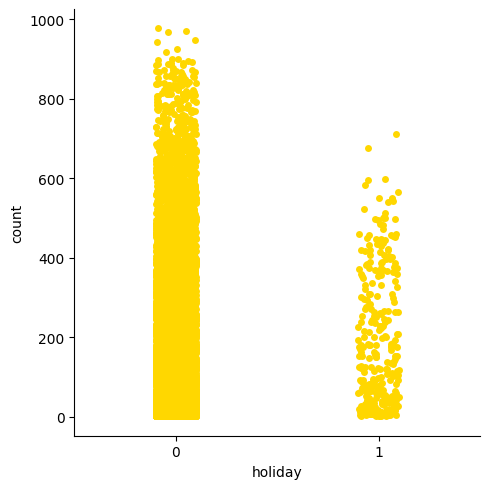

In [160]:
#Catplot plot for both columns
plt.figure(figsize=(6,3))
sns.catplot(x=train_df["holiday"],y=train_df["count"],color="gold")

Observations
1. In the train data workday define holiday as 1 and non holday as 0.
2. So at 0 means non-holiday total bike rentals are very high
3. Number of total rentals in non-holidays are 20,27,668 where as at where at holidays only 57,808

**Combining two columns "weather" and "count"**

In [161]:
train_df.groupby(["weather"])["count"].sum()

weather
1    1476063
2     507160
3     102089
4        164
Name: count, dtype: int64

<Axes: xlabel='weather', ylabel='count'>

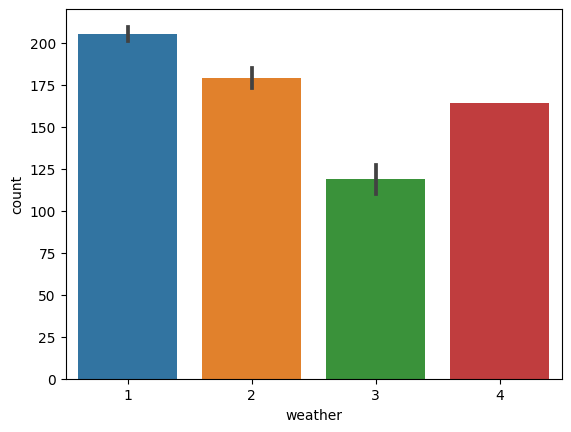

In [162]:
sns.barplot(x=train_df["weather"],y=train_df["count"])

Observations
1. In weather status 1 has high chances for bike rentals and least in weather status 3
2.  weather status 1 is 1: Clear, Few clouds, Partly cloudy, Partly cloudy which has 14,76,063 total bike rentals

#Combining three columns

**Q. in which weather bike rentals are high in which season ?**

In [163]:
train_df.groupby(["season","weather"])["count"].sum()

season  weather
1       1          223009
        2           76406
        3           12919
        4             164
2       1          426350
        2          134177
        3           27755
3       1          470116
        2          139386
        3           31160
4       1          356588
        2          157191
        3           30255
Name: count, dtype: int64

<Axes: xlabel='season', ylabel='count'>

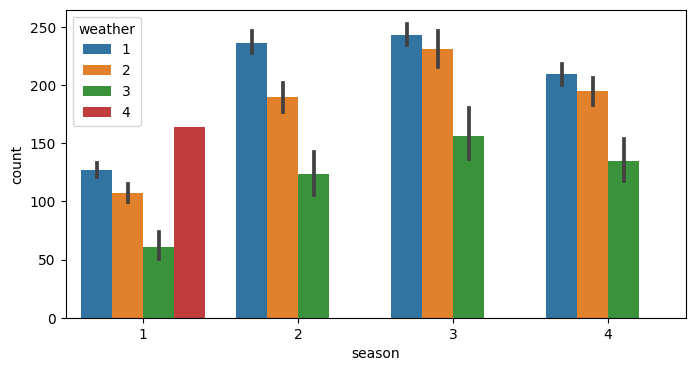

In [164]:
plt.figure(figsize=(8,4))
sns.barplot(x=train_df["season"],y=train_df["count"],hue=train_df["weather"])

Observations
1. Barplot clearly show that services in season 3 and weather type 1 of bike rental are high 
2. And least services in season type 1 and weather type 4 which is very less only 164.
3. Means spring season has all wethers in which bike rental services are very low

In [165]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Q. in which weather no of registered users of bike are high ?**

In [166]:
train_df.groupby(["weather"])["registered"].sum()

weather
1    1186163
2     419914
3      87106
4        158
Name: registered, dtype: int64

<Axes: xlabel='weather', ylabel='registered'>

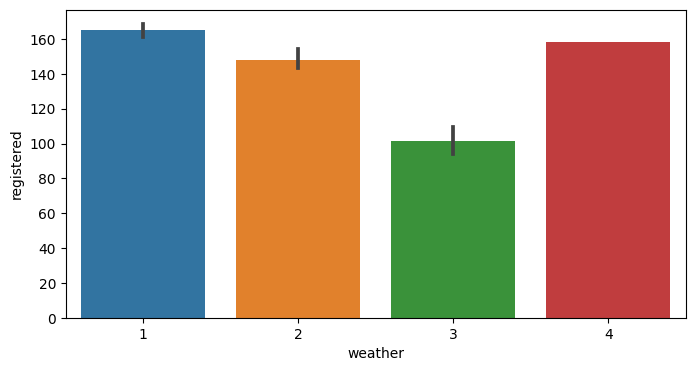

In [167]:
plt.figure(figsize=(8,4))
sns.barplot(x=train_df["weather"],y=train_df["registered"])

Observations
1. In wether type 1 number of registered users are high which is 11,86,863
2. In Weather type 3 number of registred users are low which is 158 only

**Q. in which season no of registered users of bike are high ?**

In [168]:
train_df.groupby(["season"])["registered"].sum()

season
1    270893
2    458610
3    497944
4    465894
Name: registered, dtype: int64

<Axes: xlabel='season', ylabel='registered'>

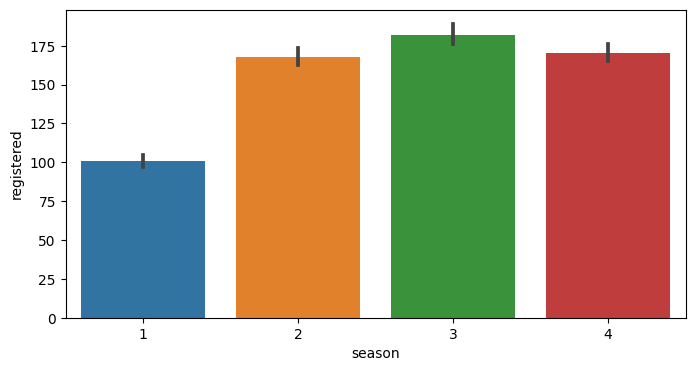

In [169]:
plt.figure(figsize=(8,4))
sns.barplot(x=train_df["season"],y=train_df["registered"])

Observations
1. Barplot clearly showing season 4 has high number of registered users and 1 has lowest

**Q. How many number of non registered bike users using services vs registered bike users?**

In [170]:
train_df["casual"].sum()

392135

In [171]:
train_df["registered"].sum()

1693341

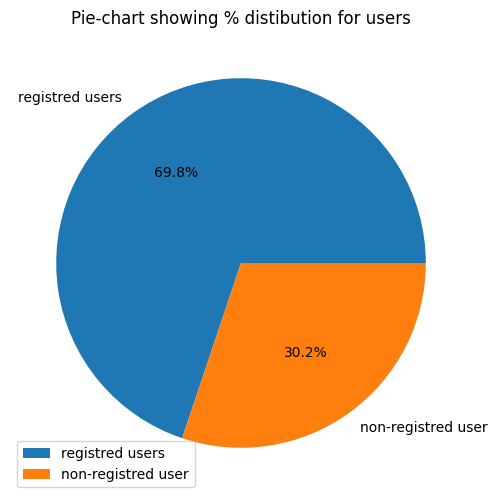

In [172]:
#pie plot for both columns
plt.figure(figsize=(6,6))
plt.pie([392135,169331],labels=["registred users","non-registred user"], autopct='%1.1f%%')
plt.title("Pie-chart showing % distibution for users")
plt.legend()
plt.show()

Observations 
1. Numbers of resgistred users are 16,93,341 means 69.8% of total reantal usres
2. Number of Non registerd users are 3,92,135 means only 30.2 % which is very low.
3. Means most of the bike users are uing bike after regustration

#Correlation of each columns

<ipython-input-173-ab801028aa4b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(),cmap="coolwarm",annot=True,square=True)


<Axes: >

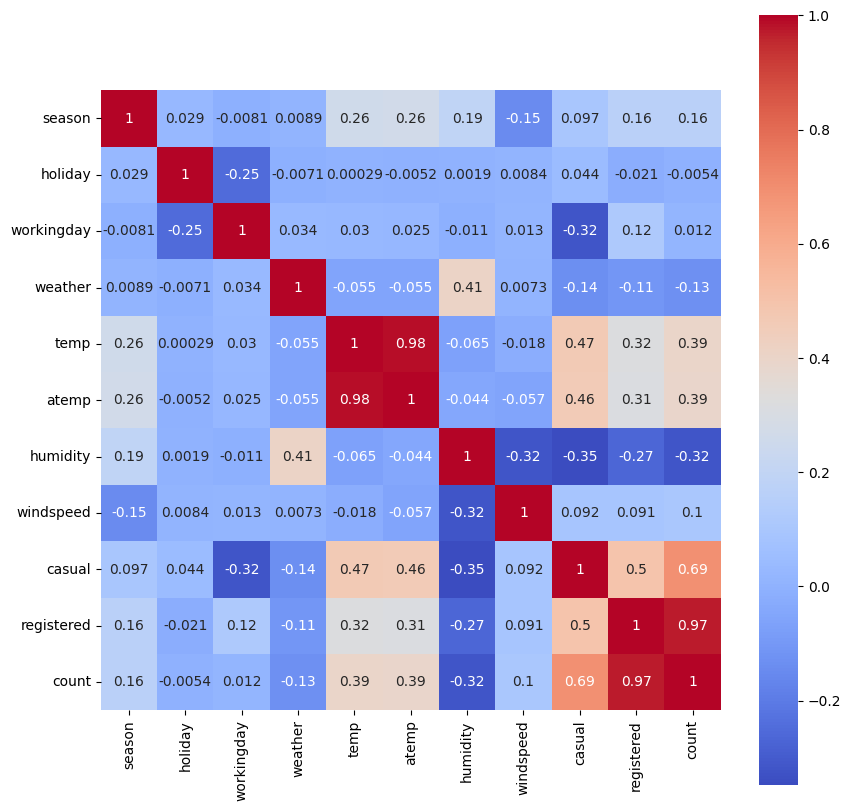

In [173]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(),cmap="coolwarm",annot=True,square=True)

<Axes: xlabel='registered', ylabel='count'>

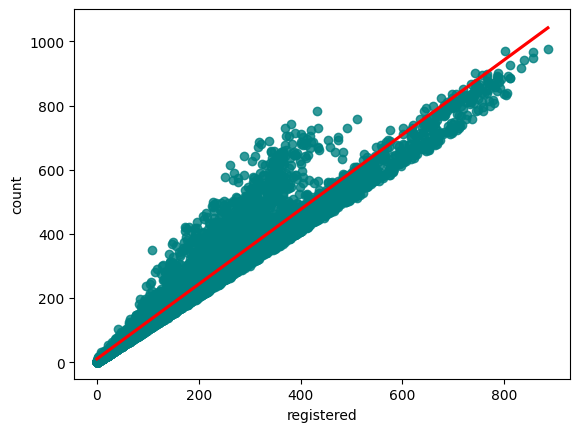

In [174]:
#Checking the corr. b/w count and registred by regplot
# RegPlot
sns.regplot(data=train_df, x="registered", y="count",scatter_kws={"color":'teal'},line_kws={"color":'red'})

Observations
1. Count and the registered columns are highly corr. as count is the sum of registered and casual columns

<Axes: xlabel='count', ylabel='humidity'>

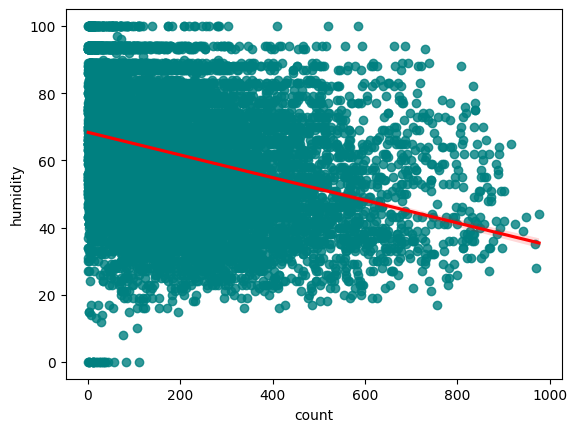

In [175]:
#Checking the corr. b/w count and humidity by regplot
# RegPlot
sns.regplot(data=train_df, x="count", y="humidity",scatter_kws={"color":'teal'},line_kws={"color":'red'})

Observtions
1. As the humidity is decreasing the number of rentals are aslo decresing and vice versa.
2. Means both columns are highly negative correlated.

#Data cleaning

###Spliting datetime in to date and time column

In [176]:
#converting datetime as (year,month,daymday_week,hour)
train_df["datetime"]=pd.to_datetime(train_df["datetime"])
test_df["datetime"]=pd.to_datetime(test_df["datetime"])

In [177]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [178]:
def split_datetime(df):
  df["year"]=df["datetime"].apply(lambda x:(x).year)
  df["month"]=df["datetime"].apply(lambda x:(x).month)
  df["day"]=df["datetime"].apply(lambda x:(x).day)
  df["dayofweek"]=df["datetime"].apply(lambda x:(x).dayofweek)
  df["hour"]=df["datetime"].apply(lambda x:(x).hour)
  return df

In [179]:
train_df=split_datetime(train_df)
test_df=split_datetime(test_df)

In [180]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


Observations
1. Applied lambda function to seprate each time varriables
2. Now daytime converted in year month day weekday hour so we can drop column daytime

In [181]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


In [182]:
train_df.drop("datetime",inplace=True,axis=1)
test_df.drop("datetime",inplace=True,axis=1)

Daytime columns are droped for both dataset

**Q> Which year has high demand of bike rental services**

In [183]:
train_df.groupby(["year"])["count"].sum()

year
2011     781979
2012    1303497
Name: count, dtype: int64

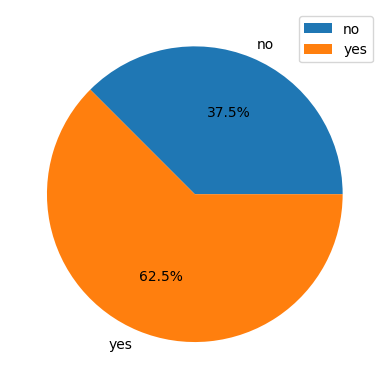

In [184]:
plt.pie([781979,1303497],labels=["no","yes"], autopct='%1.1f%%')
plt.legend()

<Axes: xlabel='year', ylabel='count'>

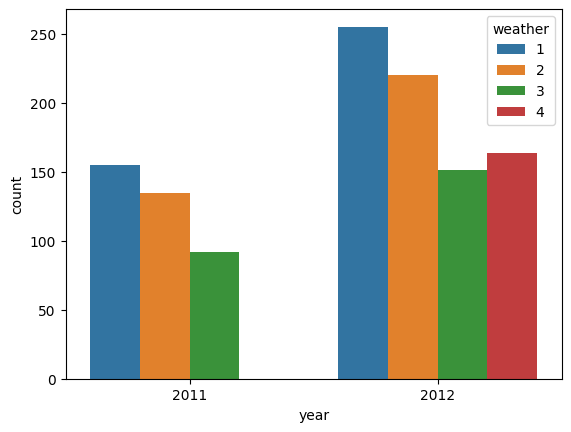

In [185]:
sns.barplot(x=train_df["year"],y=train_df["count"],errorbar=None,hue=train_df["weather"])

Observations
1. From above analysis we can conclude that 2012 has more bike rental services are active than 2011.
2. Total number of bike rented in 2012 are 13,03,497.
3. Total number of bike rented in 2011 are 7,81,979 .
4. Bike rental business are increased 25% in 2012 .

**Q> Which month has high demand of bike rental services?**

In [186]:
train_df.groupby(["month"])["count"].sum()

month
1      79884
2      99113
3     133501
4     167402
5     200147
6     220733
7     214617
8     213516
9     212529
10    207434
11    176440
12    160160
Name: count, dtype: int64

<Axes: xlabel='month', ylabel='count'>

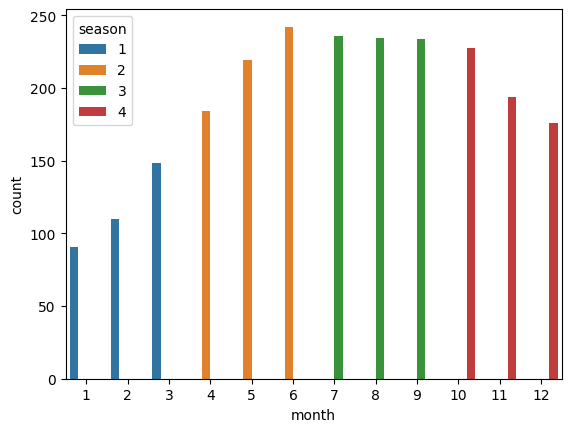

In [187]:
sns.barplot(x=train_df["month"],y=train_df["count"],hue=train_df["season"],errorbar=None)

Observations
1. Bike rental services are very high in month b/w 6 to 9
2. We can see that season 3 has high number of bike rental services
4. But highr is month June.

**Q> Which of hour has high demand of bike rental services by each week?**

<Axes: xlabel='hour', ylabel='count'>

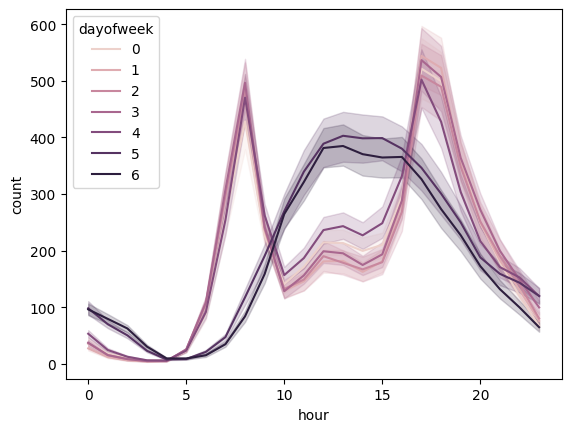

In [188]:
#Using line plot
sns.lineplot(x=train_df["hour"],y=train_df["count"],hue=train_df["dayofweek"])

Observations
1. We can clearly conclude that in morning there is a pek and in eveing there i a peak of bike users.

###Droping duplicates

In [189]:
#checkng shape of train dataset
train_df.shape

(10886, 16)

In [190]:
#dropping duplicates for train dataset
train_df.drop_duplicates(keep="first",inplace=True)

In [191]:
#againcheckng shape of train dataset
train_df.shape

(10886, 16)

Observations
1. No duplicates are present in data as shape of data won't changed

###Handling missing values for train dataset

In [192]:
#Checking missing values
train_df.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
dayofweek     0
hour          0
dtype: int64

Observations
1. No missing values are present in dataset

###Handling outliers

**Using for loop to iterate over each columns to draw boxplot**

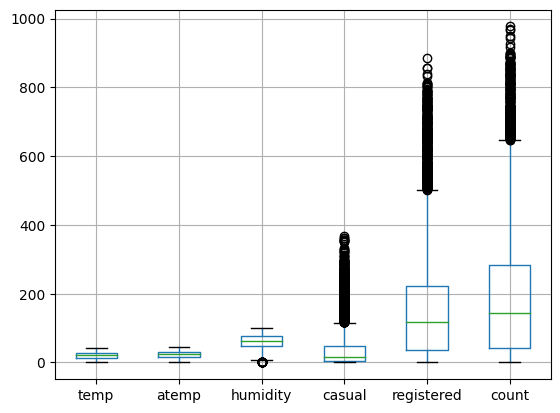

In [193]:
train_df_box=pd.DataFrame(train_df,columns=["temp","atemp","humidity","casual","registered","count"])
train_df_box.boxplot()
plt.show()

Observations
1. As we can see columns"temp","atemp","humidity",has no outliers in train dataset
2. Need to handle outliers for columns "casual","registered" & "count"

**For column casual**

In [194]:
q1=train_df["casual"].quantile(0.25)
q3=train_df["casual"].quantile(0.50)
iqr=q3-q1
#for finding inter quantile range

In [195]:
#for finding minimum_whisker
minimum_whisker=q1-1.5*iqr
minimum_whisker

-15.5

In [196]:
#for finding maximum_whisker
maximum_whisker=q3+1.5*iqr
maximum_whisker

36.5

In [197]:
len(train_df[train_df["casual"] > 50]) #Taking lenght of data which is above 50

2624

In [198]:
#Going to subtitute outliers with value of median of colum casual


In [199]:
train_df.loc[train_df["casual"] >50,"casual"] = train_df["casual"].median()

Observations
1. We found that value above 50 are extreme values
2. Subtituted after value of 50 with median

**Handling outliers for column registered**

In [200]:
q1=train_df["registered"].quantile(0.25)
q3=train_df["registered"].quantile(0.50)
iqr=q3-q1
#for finding inter quantile range

In [201]:
minimum_whisker=q1-1.5*iqr
minimum_whisker
#for finding minimum_whisker

-87.0

In [202]:
maximum_whisker=q3+1.5*iqr
maximum_whisker
#for finding maximum_whisker

241.0

In [203]:
len(train_df[train_df["registered"] > 85]) #Taking lenght of data which is above 85

6536

In [204]:
#Going to subtitute outliers with value of median
train_df.loc[train_df["registered"] >85,"registered"] = train_df["registered"].median()

<Axes: xlabel='registered'>

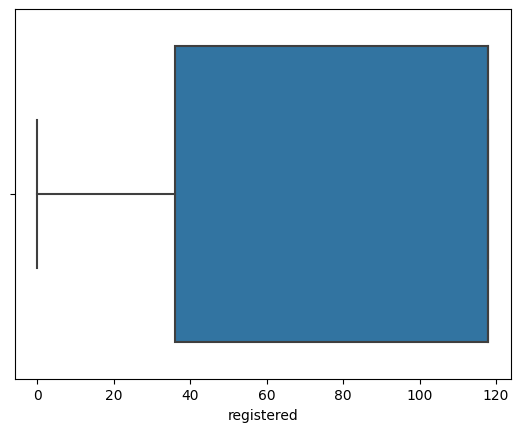

In [205]:
#plottng box plot again
sns.boxplot(x=train_df["registered"])

Observations

We found that value above 85 are extreme values
Subtituted after value of 85 with maximum whisker value

**Handling outliers for column count**

<Axes: xlabel='count'>

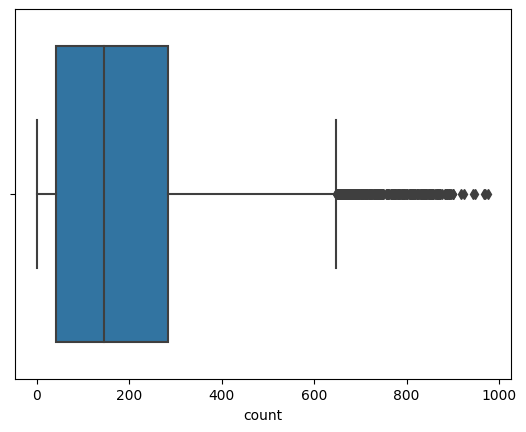

In [206]:
#box plot
sns.boxplot(x=train_df["count"])

In [207]:
q1=train_df["count"].quantile(0.25)
q3=train_df["count"].quantile(0.50)
iqr=q3-q1
#for finding inter quantile range

In [208]:
minimum_whisker=q1-1.5*iqr
minimum_whisker
#for finding minimum_whisker

-112.5

In [209]:
maximum_whisker=q3+1.5*iqr
maximum_whisker
#for finding minimum_whisker

299.5

In [210]:
len(train_df[train_df["count"] > 70]) #Taking lenght of data which is above 70

7353

In [211]:
#Going to subtitute outliers with value of median
train_df.loc[train_df["count"] >100,"count"] = train_df["count"].median()

<Axes: xlabel='count'>

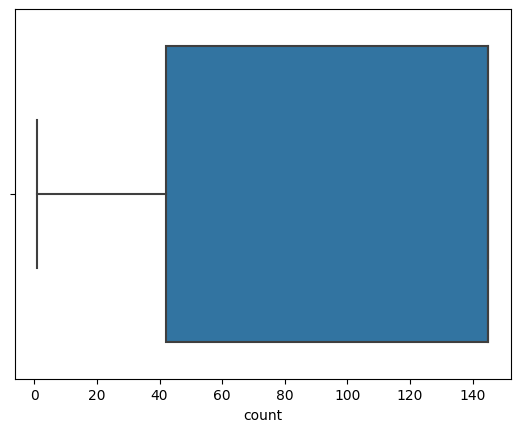

In [212]:
#box plot again
sns.boxplot(x=train_df["count"])

Observations
1. We found that value above 70 are extreme values
2. Subtituted after value of 70 with maximum whisker value

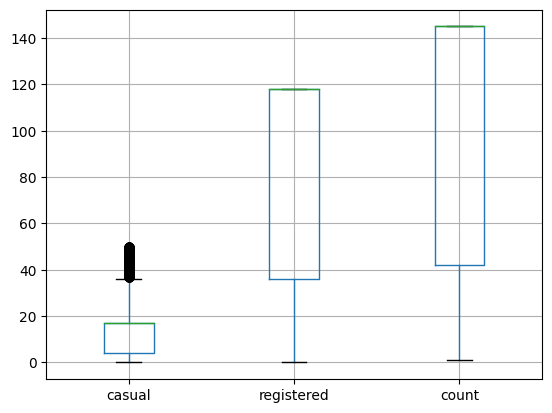

In [213]:
#Now again checking outliers
train_df_box2=pd.DataFrame(train_df,columns=["casual","registered","count"])
train_df_box2.boxplot()
plt.show()


Observations 
1. Now no outliers present in train dataset

#Handling Categorical columns

In [214]:
train_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


We observed that there is no string columns in train dataset

#Handling numerical columns

**Need to handle numerical columns "temp", "atemp", "humidity,"casual" "registered" "count"**

In [215]:
#Checking skeweness of each column
print(train_df["temp"].skew())
print(train_df["atemp"].skew())
print(train_df["humidity"].skew())
print(train_df["casual"].skew())
print(train_df["registered"].skew())
print(train_df["count"].skew())

0.003690844422472008
-0.10255951346908665
-0.08633518364548581
0.8846709265265146
-0.7271688777650821
-0.7016043505893731


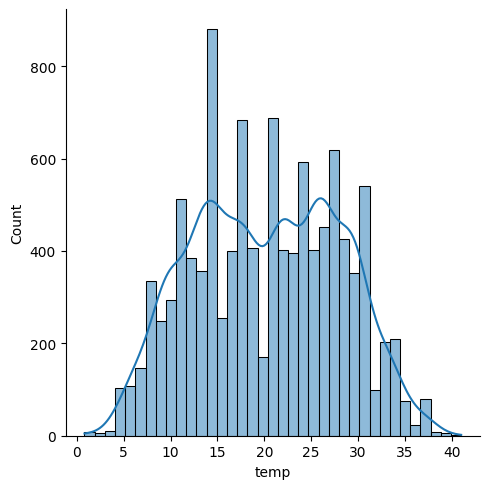

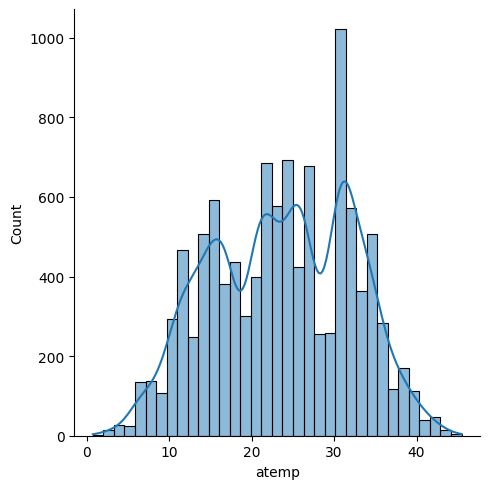

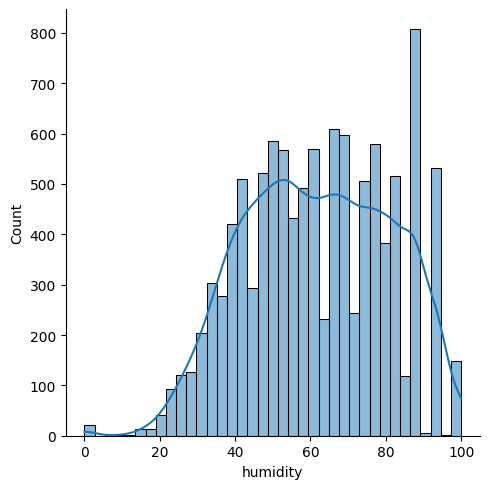

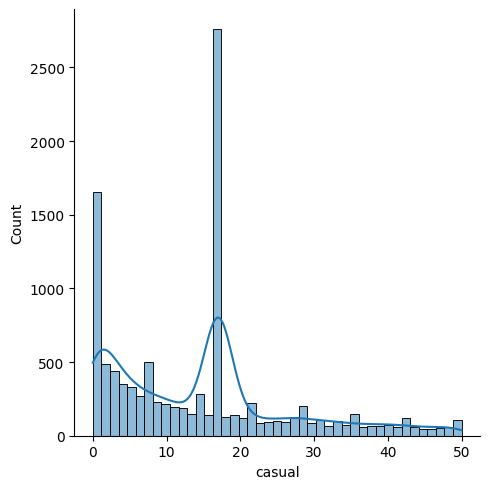

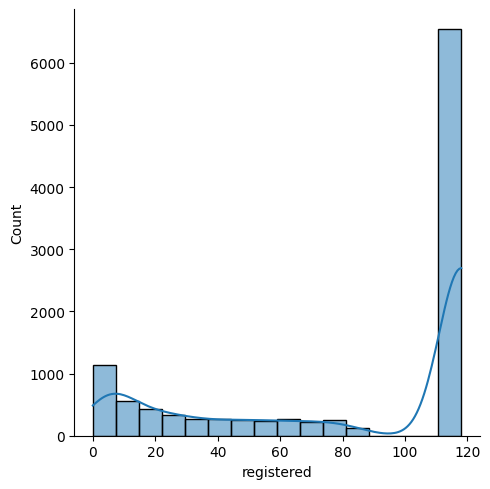

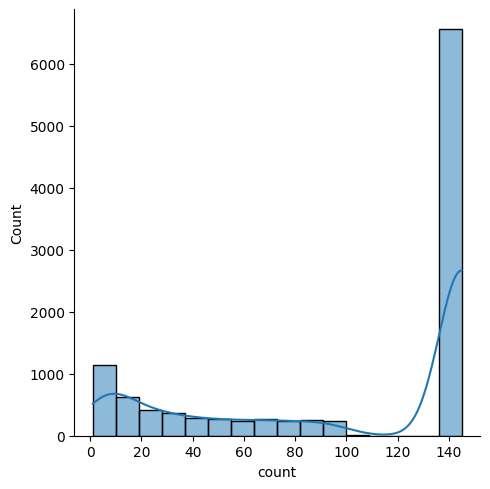

In [216]:
sns.displot(train_df["temp"],kde="kind")
sns.displot(train_df["atemp"],kde="kind")
sns.displot(train_df["humidity"],kde="kind")
sns.displot(train_df["casual"],kde="kind")
sns.displot(train_df["registered"],kde="kind")
sns.displot(train_df["count"],kde="kind")

Observation
1. We fount that column "temp", atemp", "humidity" & "casual" are not skewed we need to apply standard scaler to handle these columns
2. And columns "registered" & "count" are skewed so need to apply min-max scaler to handle these columns

**Applying standard scaler to columns  "temp", atemp", "humidity" & "casual"**

In [217]:
from sklearn.preprocessing import StandardScaler

# Standardize  "temp", atemp", "humidity" & "casual" columns
scaler = StandardScaler()
train_df[["temp","atemp","humidity","casual"]] = scaler.fit_transform(train_df[[ "temp","atemp","humidity","casual"]])
train_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,1,0,0,1,-1.333661,-1.092737,0.993213,0.0000,-0.961246,13,16,2011,1,1,5,0
1,1,0,0,1,-1.438907,-1.182421,0.941249,0.0000,-0.548854,32,40,2011,1,1,5,1
2,1,0,0,1,-1.438907,-1.182421,0.941249,0.0000,-0.796289,27,32,2011,1,1,5,2
3,1,0,0,1,-1.333661,-1.092737,0.681430,0.0000,-0.961246,10,13,2011,1,1,5,3
4,1,0,0,1,-1.333661,-1.092737,0.681430,0.0000,-1.208682,1,1,2011,1,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,-0.596935,-0.467310,-0.617666,26.0027,-0.631332,118,145,2012,12,19,2,19
10882,4,0,1,1,-0.702182,-0.735182,-0.253919,15.0013,-0.383897,118,145,2012,12,19,2,20
10883,4,0,1,1,-0.807428,-0.913959,-0.046064,15.0013,-0.878768,118,145,2012,12,19,2,21
10884,4,0,1,1,-0.807428,-0.735182,-0.046064,6.0032,-0.218940,118,145,2012,12,19,2,22


**Applying minmaxscaler to columns "registered" & "count"**

In [218]:
from sklearn.preprocessing import MinMaxScaler

# Standardize  "registered" & "count" columns
scaler = MinMaxScaler()
train_df[["registered","count"]] = scaler.fit_transform(train_df[[ "registered","count"]])
train_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,1,0,0,1,-1.333661,-1.092737,0.993213,0.0000,-0.961246,0.110169,0.104167,2011,1,1,5,0
1,1,0,0,1,-1.438907,-1.182421,0.941249,0.0000,-0.548854,0.271186,0.270833,2011,1,1,5,1
2,1,0,0,1,-1.438907,-1.182421,0.941249,0.0000,-0.796289,0.228814,0.215278,2011,1,1,5,2
3,1,0,0,1,-1.333661,-1.092737,0.681430,0.0000,-0.961246,0.084746,0.083333,2011,1,1,5,3
4,1,0,0,1,-1.333661,-1.092737,0.681430,0.0000,-1.208682,0.008475,0.000000,2011,1,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,-0.596935,-0.467310,-0.617666,26.0027,-0.631332,1.000000,1.000000,2012,12,19,2,19
10882,4,0,1,1,-0.702182,-0.735182,-0.253919,15.0013,-0.383897,1.000000,1.000000,2012,12,19,2,20
10883,4,0,1,1,-0.807428,-0.913959,-0.046064,15.0013,-0.878768,1.000000,1.000000,2012,12,19,2,21
10884,4,0,1,1,-0.807428,-0.735182,-0.046064,6.0032,-0.218940,1.000000,1.000000,2012,12,19,2,22


**Going to hadle year as order form**

setting as 2011 as 1 & 2012 as 2 , because 2011 is lesser in orderwise

In [219]:
train_df["year"].replace({2011:1, 2012:2},inplace=True)

In [220]:
train_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,1,0,0,1,-1.333661,-1.092737,0.993213,0.0,-0.961246,0.110169,0.104167,1,1,1,5,0
1,1,0,0,1,-1.438907,-1.182421,0.941249,0.0,-0.548854,0.271186,0.270833,1,1,1,5,1
2,1,0,0,1,-1.438907,-1.182421,0.941249,0.0,-0.796289,0.228814,0.215278,1,1,1,5,2
3,1,0,0,1,-1.333661,-1.092737,0.681430,0.0,-0.961246,0.084746,0.083333,1,1,1,5,3
4,1,0,0,1,-1.333661,-1.092737,0.681430,0.0,-1.208682,0.008475,0.000000,1,1,1,5,4


Now data is ready for model building